In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import mne

In [2]:
data = None
with open('data_stream.json', 'r') as f:
    data = json.load(f)

In [5]:
data = data['data']

In [8]:
def transpose_list_of_lists(matrix):
    return [[row[i] for row in matrix] for i in range(len(matrix[0]))]

transposed_data = transpose_list_of_lists(data)

In [11]:
data_stream = np.array(transposed_data[0])
timestamps = np.array(transposed_data[1])

In [27]:
timestamps = timestamps - timestamps[0]

In [13]:
data_stream.shape, timestamps.shape

((1277, 6), (1277,))

In [16]:
data_stream[0]

array([618459,   2542,   1403,   2289,   4095,    983])

Data stream values per sample: 

`millis, ch0, ch1, ch2, ch3, ch4`

In [34]:
data_stream[:, 4]

array([4095, 4095, 4095, ...,  717,  969,  693])

In [17]:
channel_data = data_stream[:, 1:]

In [40]:
esp_timestamps = data_stream[:, 0]
esp_timestamps

array([618459, 618460, 618461, ..., 621843, 621844, 621845])

In [47]:
max(np.diff(esp_timestamps)), min(np.diff(esp_timestamps))

(11, 1)

In [43]:
np.average(np.diff(esp_timestamps))

2.653605015673981

Text(0, 0.5, 'analog value')

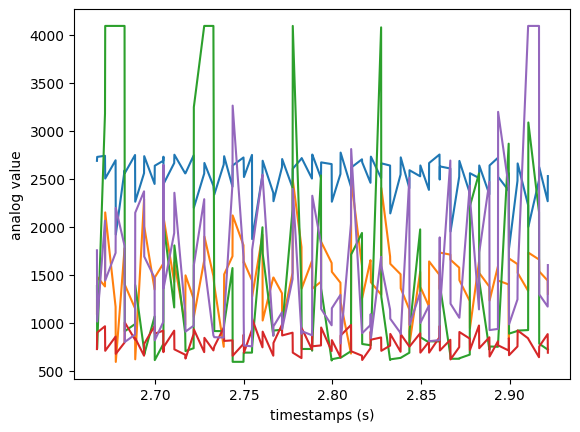

In [38]:
window_start = 1000
window_end = 1100
for channel_no in range(channel_data.shape[1]):
    plt.plot(timestamps[window_start:window_end], channel_data[window_start:window_end, channel_no])

plt.xlabel("timestamps (s)")
plt.ylabel("analog value")

In [98]:
sfreq = 1200
ch_names = ["A0", "A1", "A2", "A3", "A4"]
neurowrist_info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='emg')

# calculation for sampling rate:
# 115200 bits per second / (16 bits per integer * 6 integers streamed ) = 1200 Hz

In [99]:
data_stream_EvokArr = mne.EvokedArray(channel_data.T, neurowrist_info)

In [100]:
data_stream_EvokArr

Condition,
Data kind,average
Timepoints,1277 samples
Channels,5 channels
Number of averaged epochs,1
Time range (secs),0.0 – 1.0633333333333332
Baseline (secs),off


In [101]:
type(data_stream_EvokArr)

mne.evoked.EvokedArray

In [102]:
ch_names_wo_a3 = ["A0", "A1", "A2", "A4"]

In [109]:
a = data_stream_EvokArr.compute_psd(fmin=0, fmax=600, tmin=0, tmax=1, picks=ch_names_wo_a3)

    Using multitaper spectrum estimation with 7 DPSS windows


Plotting power spectral density (dB=True).


/var/folders/k3/7xd0n6695t7g3x0jb1w0brkr0000gn/T/ipykernel_37037/3184619436.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  a.plot(picks=ch_names_wo_a3)
/var/folders/k3/7xd0n6695t7g3x0jb1w0brkr0000gn/T/ipykernel_37037/3184619436.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  a.plot(picks=ch_names_wo_a3)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


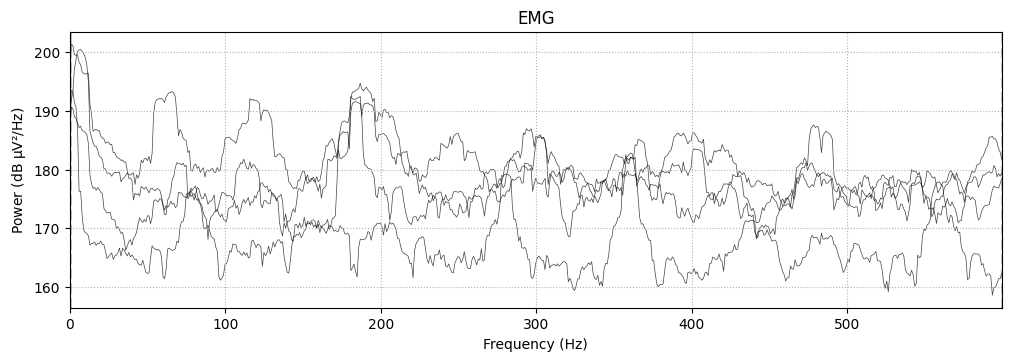

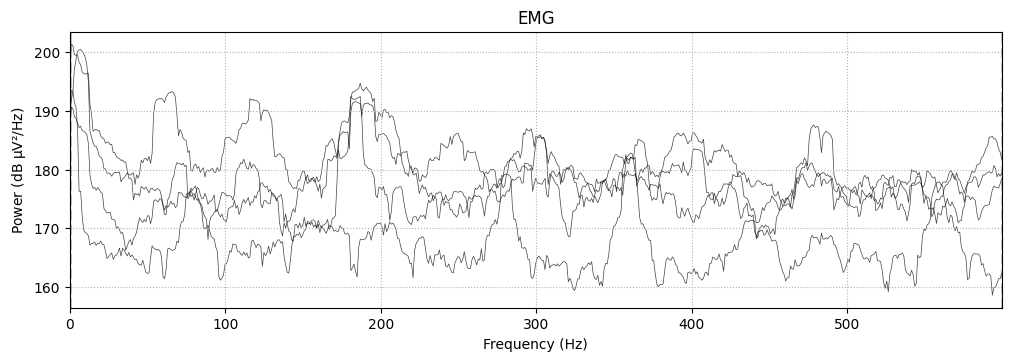

In [110]:
# ch_names1 = ch_names.remove("A3")
a.plot(picks=ch_names_wo_a3)


In [108]:
ch_names

['A0', 'A1', 'A2', 'A3', 'A4']